# 解析

number :	 820
number :	 820
Ms=	 0.0028574704941579875 (emu)
Ms=	 614.5097836898898 (emu/cc)
Mr=	 507.3761174503512 (emu/cc)
Hk=	 165.5 (Oe)
K1=	 35461.24352528727 (erg/cc)
Hc=	 47.5728688982856 (Oe)
Sample Volume :	 4.65e-06 (cc)


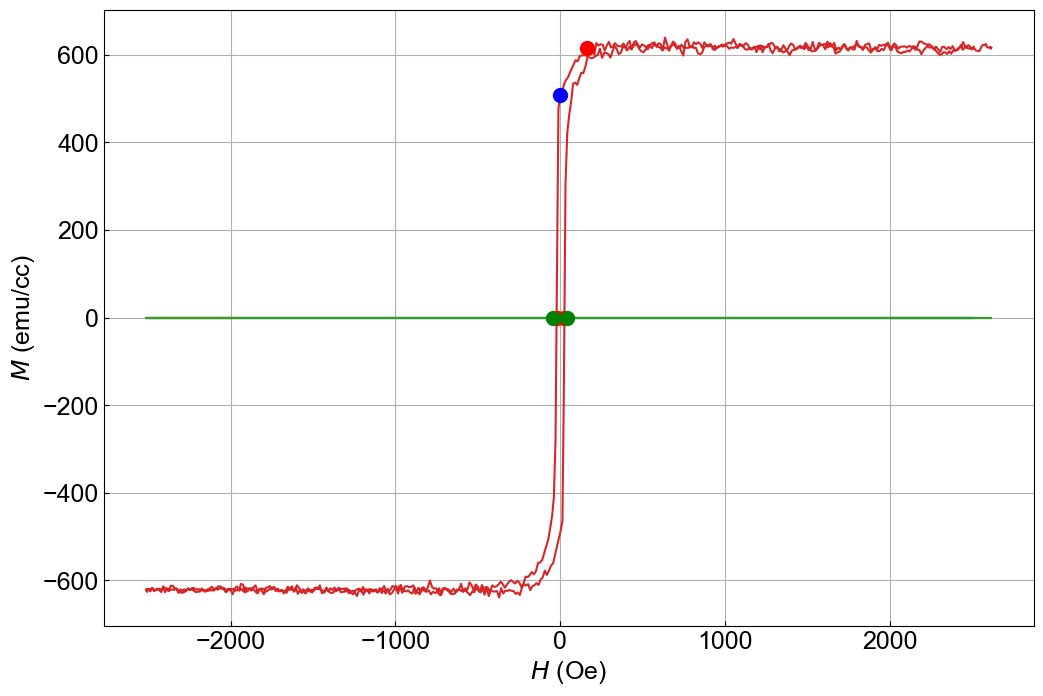

In [12]:
#関数の定義
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 8))

#データのパス
path="/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/VSM/240202"
filename="240201nico40-3-110"
save_path="/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/解析/rerevsm/新試料"

#異方性磁界調整
C=20

#残留磁化調整
A=0

###試料体積sample_volume(cc)#########################
#10 mm角
sv=0.00000465

#7 mm角
#sv=0.7*0.7*50*10**(-7)

#角田研sample
#sv=2.8*10**(-6)

#1インチ
#sv=27.178*10**(-6)
###データの代入#############################################
file_name_easy=f'{path}/{filename}.txt'
fixed_file_name_easy=f'{save_path}/fixed_{filename}.txt'

"""
###困難軸もやる場合################################################
file_name_easy=f'{path}/{filename}110.txt'
fixed_file_name_easy=f'{path}/{filename}110.txt'
"""

###フィッティングの範囲（飽和してる領域)の選択#######################
"""
Hs=250
Hf=2000
N=3200
"""
Hs=2000
Hf=2500
N=3200

###データの代入#########################################

x_list=[]
y_list=[]
x1_list=[]
y1_list=[]
x2_list=[]
y2_list=[]

n=0
f=open(file_name_easy,'rt',encoding='shift_jis')
for i in range(59):
    next(f)
for line in f :
    data = line[:-1].split('\t')
    n=n+1
    if Hs<= float(data[0]) <=Hf:   
        x_list.append(float(data[0]))
        y_list.append(float(data[1]))
        x1_list.append(float(data[0]))
        y1_list.append(float(data[1]))
    elif -1*Hf<= float(data[0]) <=-1*Hs:
        x_list.append(float(data[0]))
        y_list.append(float(data[1]))
        x2_list.append(float(data[0]))
        y2_list.append(float(data[1]))
    else:
        x_list.append(float(data[0]))
        y_list.append(float(data[1]))
#plt.plot(x_list,y_list)

###フィッティングによる校正######################################
aR,bR=np.polyfit(x1_list,y1_list,1)
aL,bL=np.polyfit(x2_list,y2_list,1)
plt.plot(x1_list,np.multiply(x1_list,aR)+bR)
plt.plot(x2_list,np.multiply(x2_list,aL)+bL)
plt.plot(x_list,np.multiply(x_list,aR),color='tab:orange')
plt.plot(x_list,np.multiply(x_list,aL),color='tab:green')
plt.plot(x_list,np.multiply(x_list,(aR+aL)/2)+(bR+bL)/2)

fit=y_list-(np.multiply(x_list,(aR+aL)/2)+(bR+bL)/2)
#plt.plot(x_list,fit)

#emu/ccに変換してプロット(角田研試料)###################################
fixed_fit=fit/sv
plt.plot(x_list,fixed_fit)

"""
###保持力の計算############################################
d=0
h1=0
h2=0
k=4
for i in range(0,int(n/2)-k-1):
    if d<np.abs(y_list[i]-y_list[i+k]):
        d=np.abs(y_list[i]-y_list[i+k])
        h1=(x_list[i]*y_list[i+k]-x_list[i+k]*y_list[i])/(y_list[i+k]-y_list[i])
    else:
        pass
d=0
for i in range(int(n/2)-1,n-k-1):
    if d<np.abs(y_list[i]-y_list[i+k]):
        d=np.abs(y_list[i]-y_list[i+k])
        h2=(x_list[i]*y_list[i+k]-x_list[i+k]*y_list[i])/(y_list[i+k]-y_list[i])
    else:
        pass
plt.plot(h1,0,'o',color='RED',ms=10)
plt.plot(h2,0,'o',color='RED',ms=10)
"""
###保持力の計算2############################################

k=1
for i in range(0,int(n/2)-k-1):
    if fit[i]*fit[i+k]<0:
        h1=(x_list[i]*fit[i+k]-x_list[i+k]*fit[i])/(fit[i+k]-fit[i])
    else:
        pass
d=0
for i in range(int(n/2)-1,n-k-1):
    if fit[i]*fit[i+k]<0:
        h2=(x_list[i]*fit[i+k]-x_list[i+k]*fit[i])/(fit[i+k]-fit[i])
    else:
        pass
plt.plot(h1,0,'o',color='RED',ms=10)
plt.plot(h2,0,'o',color='RED',ms=10)

###残留磁化の計算############################################
positive_x_list = [x for x in x_list if x >= 0+A]
min_value = min(positive_x_list)

Mr=0
for i in range(len(x_list)):
    if x_list[i] == min_value:
        Mr = fit[i]/sv
        plt.plot(0,abs(Mr),'o',color='Blue',ms=10)
        
    else:
        pass

###異方性磁界の計算############################################
ms=np.average(y1_list-(np.multiply(x1_list,(aR+aL)/2)+(bR+bL)/2))
Ms=np.average(y1_list-(np.multiply(x1_list,(aR+aL)/2)+(bR+bL)/2))/sv
positive_fit = [x for x in fixed_fit if x > Ms-C]
min_value = min(positive_fit)

Hk=0
for i in range(len(fixed_fit)):
    if fixed_fit[i] == min_value:
        Hk = x_list[i]
        plt.plot(Hk,abs(Ms),'o',color='RED',ms=10)
        
    else:
        pass
    
K1=Hk*(Ms-abs(Mr))/2*4

###ファイルに書き込み#########################################
delta=n-N
if delta%2==0: #even
    x_list=x_list[int(delta/2):n-int(delta/2)]
    fixed_fit=fixed_fit[int(delta/2):n-int(delta/2)]
else:
    x_list=x_list[int(delta/2)+1:n-int(delta/2)]
    fixed_fit=fixed_fit[int(delta/2)+1:n-int(delta/2)]  
    

with open(fixed_file_name_easy,'w') as f:
    f.write("Ms(emu)= \t %e \n"%np.average(y1_list-(np.multiply(x1_list,(aR+aL)/2)+(bR+bL)/2)))
    f.write("Hc(Oe)= \t %e \n"%np.abs(h1-h2))
    f.write("Ms(emu/cc)= \t %e \n"%(np.average(y1_list-(np.multiply(x1_list,(aR+aL)/2)+(bR+bL)/2))/sv))
    f.write("Mr(emu/cc)= \t %e \n"%abs(Mr))
    f.write("Hk(Oe)= \t %e \n"%Hk)
    f.write("K1(erg/cc)= \t %e \n"%K1)
    f.write("sample_volume(cc)= \t %e \n"%sv)
    f.write("H(Oe) \t M(emu/cc) \n")
    a=0
    for i in x_list:
        a=a+1
        f.write("%e\t"%i)
        b=0
        for j in fixed_fit:
            b=b+1
            if a==b:
                f.write("%e\n"%j)
            else:
                pass

###プロット################################################
print('number :\t',n)
print('number :\t',a)
print('Ms=\t',np.average(y1_list-(np.multiply(x1_list,(aR+aL)/2)+(bR+bL)/2)),'(emu)')
print('Ms=\t',(np.average(y1_list-(np.multiply(x1_list,(aR+aL)/2)+(bR+bL)/2))/sv),'(emu/cc)')
print('Mr=\t',abs(Mr),'(emu/cc)')
print('Hk=\t',Hk,'(Oe)')
print('K1=\t',Hk*(Ms-abs(Mr))/2*4,'(erg/cc)')
print('Hc=\t',np.abs(h1-h2),'(Oe)')
print('Sample Volume :\t',sv,'(cc)')

plt.plot(42,0,'o',color='GREEN',ms=10)
plt.plot(-41,0,'o',color='GREEN',ms=10)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('$H$ (Oe)', fontsize=18)
plt.ylabel('$M$ (emu)', fontsize=18)
plt.ylabel('$M$ (emu/cc)', fontsize=18)

plt.show()

fig.savefig(f'{save_path}/fixed_{filename}.pdf',format="pdf", bbox_inches="tight", pad_inches=0.1)
fig.savefig(f'{save_path}/fixed_{filename}.png',format="png", bbox_inches="tight", pad_inches=0.1)

# 重ね

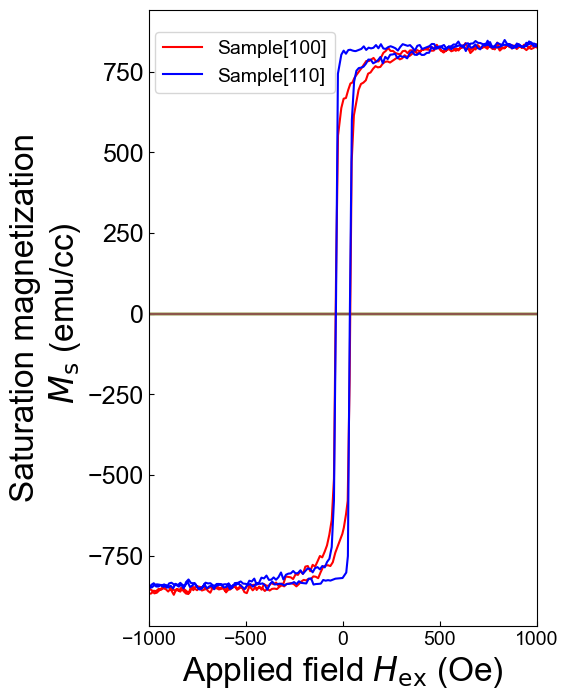

In [2]:
#関数の定義
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#データのパス
path="/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/VSM/240126"
filename1="240124nico40-3-mgo100" #[100]方向
filename2="240124nico40-3-mgo110" #[110]方向
save_path="/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/解析/rerevsm/VSM/Fig"

###試料体積sample_volume(cc)#########################
#10 mm角
sv=0.00000465

#7 mm角
#sv=0.7*0.7*50*10**(-7)

#角田研sample
#sv=2.8*10**(-6)

###データの代入#############################################
file_name_easy1=f'{path}/{filename1}.txt'
fixed_file_name_easy1=f'{save_path}/fixed_{filename1}.txt'

file_name_easy2=f'{path}/{filename2}.txt'
fixed_file_name_easy2=f'{save_path}/fixed_{filename2}.txt'

#グラフサイズ
fig=plt.figure(figsize=(5, 8))

"""
###困難軸もやる場合################################################
file_name_easy=f'{path}/{filename}110.txt'
fixed_file_name_easy=f'{path}/{filename}110.txt'
"""

###フィッティングの範囲（飽和してる領域)の選択#######################

Hs=2000
Hf=2500
N=3200
"""
Hs=250
Hf=2000
N=3200
"""
###データの代入#########################################

x_list=[]
y_list=[]
x1_list=[]
y1_list=[]
x2_list=[]
y2_list=[]

n=0
f=open(file_name_easy1,'rt',encoding='shift_jis')
for i in range(59):
    next(f)
for line in f :
    data = line[:-1].split('\t')
    n=n+1
    if Hs<= float(data[0]) <=Hf:   
        x_list.append(float(data[0]))
        y_list.append(float(data[1]))
        x1_list.append(float(data[0]))
        y1_list.append(float(data[1]))
    elif -1*Hf<= float(data[0]) <=-1*Hs:
        x_list.append(float(data[0]))
        y_list.append(float(data[1]))
        x2_list.append(float(data[0]))
        y2_list.append(float(data[1]))
    else:
        x_list.append(float(data[0]))
        y_list.append(float(data[1]))
#plt.plot(x_list,y_list)

xa_list=[]
ya_list=[]
x3_list=[]
y3_list=[]
x4_list=[]
y4_list=[]

n=0
f=open(file_name_easy2,'rt',encoding='shift_jis')
for i in range(59):
    next(f)
for line in f :
    data = line[:-1].split('\t')
    n=n+1
    if Hs<= float(data[0]) <=Hf:   
        xa_list.append(float(data[0]))
        ya_list.append(float(data[1]))
        x3_list.append(float(data[0]))
        y3_list.append(float(data[1]))
    elif -1*Hf<= float(data[0]) <=-1*Hs:
        xa_list.append(float(data[0]))
        ya_list.append(float(data[1]))
        x4_list.append(float(data[0]))
        y4_list.append(float(data[1]))
    else:
        xa_list.append(float(data[0]))
        ya_list.append(float(data[1]))

###フィッティングによる校正######################################
aR,bR=np.polyfit(x1_list,y1_list,1)
aL,bL=np.polyfit(x2_list,y2_list,1)
plt.plot(x1_list,np.multiply(x1_list,aR)+bR)
plt.plot(x2_list,np.multiply(x2_list,aL)+bL)
plt.plot(x_list,np.multiply(x_list,aR),color='tab:orange')
plt.plot(x_list,np.multiply(x_list,aL),color='tab:green')
plt.plot(x_list,np.multiply(x_list,(aR+aL)/2)+(bR+bL)/2)

fit=y_list-(np.multiply(x_list,(aR+aL)/2)+(bR+bL)/2)
#plt.plot(x_list,fit)

aR,bR=np.polyfit(x3_list,y3_list,1)
aL,bL=np.polyfit(x4_list,y4_list,1)
plt.plot(x3_list,np.multiply(x3_list,aR)+bR)
plt.plot(x4_list,np.multiply(x4_list,aL)+bL)
plt.plot(xa_list,np.multiply(xa_list,aR),color='tab:orange')
plt.plot(xa_list,np.multiply(xa_list,aL),color='tab:green')
plt.plot(xa_list,np.multiply(xa_list,(aR+aL)/2)+(bR+bL)/2)

fit_a=ya_list-(np.multiply(xa_list,(aR+aL)/2)+(bR+bL)/2)
#plt.plot(xa_list,fit_a)

#emu/ccに変換してプロット(角田研試料)###################################
fixed_fit=fit/sv
plt.plot(x_list,fixed_fit,color='RED',label='Sample[100]')

fixed_fit_a=fit_a/sv
plt.plot(xa_list,fixed_fit_a,color='BLUE',label='Sample[110]')

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(-0.01, 0.98), loc='upper left',fontsize=14)
#plt.legend()

plt.xticks(np.arange(-1000, 1001, 500))
#plt.yticks(np.arange(-1500, 1501, 200))

plt.xlim(-1000,1001)
#plt.ylim(-900,901)

plt.xlabel('Applied field $H_\mathrm{ex}$ (Oe)', fontsize=24)
plt.ylabel('Saturation magnetization\n $M_\mathrm{s}$ (emu/cc)', fontsize=24)
#plt.ylabel('飽和磁化\n $Mmathrm_{s}$ (emu/cc)', fontsize=18,fontname="Meiryo")

plt.xticks(fontsize=14)
plt.yticks(fontsize=18)
plt.grid(False)
#plt.xlabel('$H$ (Oe)', fontsize=18)
#plt.ylabel('$M$ (emu)', fontsize=18)
#plt.ylabel('$M$ (emu/cc)', fontsize=18)

plt.show()
#fig = plt.figure(figsize=(10, 10))

fig.savefig(f'{save_path}/{filename1}fixed_both.pdf',format="pdf", bbox_inches="tight", pad_inches=0.1)
fig.savefig(f'{save_path}/{filename1}fixed_both.png',format="png", bbox_inches="tight", pad_inches=0.1)

# 拡大

'\nsave_path="/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/解析/VSM/Fig"\nfig.savefig(f\'{save_path}/figure_{filename1}_large.pdf\',format="pdf", bbox_inches="tight", pad_inches=0.1)\nfig.savefig(f\'{save_path}/figure_{filename1}_large.png\',format="png", bbox_inches="tight", pad_inches=0.1)\n'

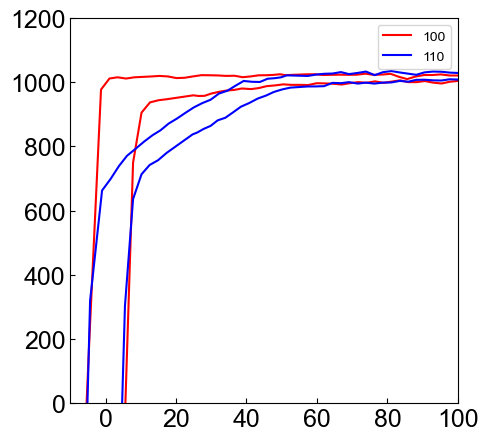

In [82]:
fig = plt.figure(figsize=(5, 5))

plt.plot(x_list,fixed_fit,color='RED',label="100")
plt.plot(xa_list,fixed_fit_a,color='BLUE',label="110")
plt.legend()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)
#plt.ylabel('$ΔH_\mathrm{pp}$ (Oe)', fontsize=18)
#plt.xlabel('$θ_\mathrm{H}$ (deg.)', fontsize=18)
plt.xlim(-10,100)
plt.ylim(0,1200)
"""
save_path="/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/解析/VSM/Fig"
fig.savefig(f'{save_path}/figure_{filename1}_large.pdf',format="pdf", bbox_inches="tight", pad_inches=0.1)
fig.savefig(f'{save_path}/figure_{filename1}_large.png',format="png", bbox_inches="tight", pad_inches=0.1)
"""

# 1inch

number :	 1647
number :	 775
Ms=	 0.01762695574984954 (emu)
Ms=	 648.5744260007925 (emu/cc)
Mr=	 654.7669937031369 (emu/cc)
Hk=	 18.0 (Oe)
K1=	 -222.93243728439757 (erg/cc)
Hc=	 20.095269161408847 (Oe)
Sample Volume :	 2.7178e-05 (cc)


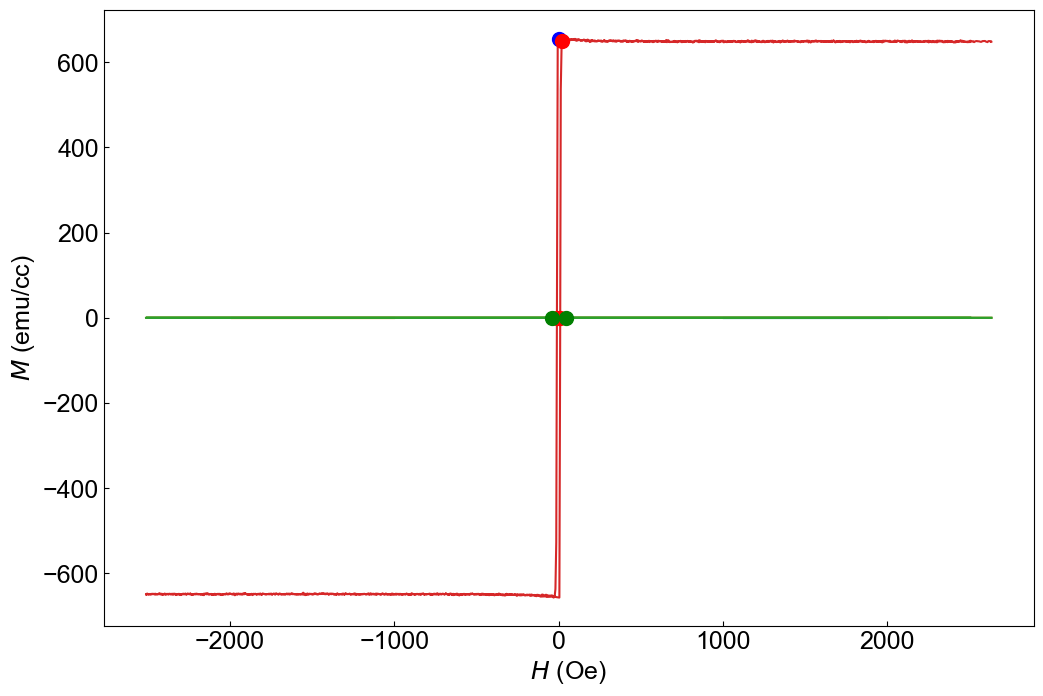

In [14]:
#関数の定義
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 8))

#データのパス
path="/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/VSM/240627"
filename="240626NiCo20-1inch-100"
save_path="/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/解析/rerevsm/新試料"

#異方性磁界調整
C=50

#残留磁化調整
A=0

###試料体積sample_volume(cc)#########################
#1inch
sv=2.54*2.14*5*10**(-6)
#角田研sample
#sv=2.8*10**(-6)
###データの代入#############################################
file_name_easy=f'{path}/{filename}.txt'
fixed_file_name_easy=f'{save_path}/fixed_{filename}.txt'

"""
###困難軸もやる場合################################################
file_name_easy=f'{path}/{filename}110.txt'
fixed_file_name_easy=f'{path}/{filename}110.txt'
"""

###フィッティングの範囲（飽和してる領域)の選択#######################
Hs=1000
Hf=2000
N=3200

###データの代入#########################################

x_list=[]
y_list=[]
x1_list=[]
y1_list=[]
x2_list=[]
y2_list=[]

n=0
f=open(file_name_easy,'rt',encoding='shift_jis')
for i in range(59):
    next(f)
for line in f :
    data = line[:-1].split('\t')
    n=n+1
    if Hs<= float(data[0]) <=Hf:   
        x_list.append(float(data[0]))
        y_list.append(float(data[1]))
        x1_list.append(float(data[0]))
        y1_list.append(float(data[1]))
    elif -1*Hf<= float(data[0]) <=-1*Hs:
        x_list.append(float(data[0]))
        y_list.append(float(data[1]))
        x2_list.append(float(data[0]))
        y2_list.append(float(data[1]))
    else:
        x_list.append(float(data[0]))
        y_list.append(float(data[1]))
#plt.plot(x_list,y_list)

###フィッティングによる校正######################################
aR,bR=np.polyfit(x1_list,y1_list,1)
aL,bL=np.polyfit(x2_list,y2_list,1)
plt.plot(x1_list,np.multiply(x1_list,aR)+bR)
plt.plot(x2_list,np.multiply(x2_list,aL)+bL)
plt.plot(x_list,np.multiply(x_list,aR),color='tab:orange')
plt.plot(x_list,np.multiply(x_list,aL),color='tab:green')
plt.plot(x_list,np.multiply(x_list,(aR+aL)/2)+(bR+bL)/2)

fit=y_list-(np.multiply(x_list,(aR+aL)/2)+(bR+bL)/2)
#plt.plot(x_list,fit)

#emu/ccに変換してプロット(角田研試料)###################################
fixed_fit=fit/sv
plt.plot(x_list,fixed_fit)

"""
###保持力の計算############################################
d=0
h1=0
h2=0
k=4
for i in range(0,int(n/2)-k-1):
    if d<np.abs(y_list[i]-y_list[i+k]):
        d=np.abs(y_list[i]-y_list[i+k])
        h1=(x_list[i]*y_list[i+k]-x_list[i+k]*y_list[i])/(y_list[i+k]-y_list[i])
    else:
        pass
d=0
for i in range(int(n/2)-1,n-k-1):
    if d<np.abs(y_list[i]-y_list[i+k]):
        d=np.abs(y_list[i]-y_list[i+k])
        h2=(x_list[i]*y_list[i+k]-x_list[i+k]*y_list[i])/(y_list[i+k]-y_list[i])
    else:
        pass
plt.plot(h1,0,'o',color='RED',ms=10)
plt.plot(h2,0,'o',color='RED',ms=10)
"""
###保持力の計算2############################################

k=1
for i in range(0,int(n/2)-k-1):
    if fit[i]*fit[i+k]<0:
        h1=(x_list[i]*fit[i+k]-x_list[i+k]*fit[i])/(fit[i+k]-fit[i])
    else:
        pass
d=0
for i in range(int(n/2)-1,n-k-1):
    if fit[i]*fit[i+k]<0:
        h2=(x_list[i]*fit[i+k]-x_list[i+k]*fit[i])/(fit[i+k]-fit[i])
    else:
        pass
plt.plot(h1,0,'o',color='RED',ms=10)
plt.plot(h2,0,'o',color='RED',ms=10)

###残留磁化の計算############################################
positive_x_list = [x for x in x_list if x >= 0+A]
min_value = min(positive_x_list)

Mr=0
for i in range(len(x_list)):
    if x_list[i] == min_value:
        Mr = fit[i]/sv
        plt.plot(0,abs(Mr),'o',color='Blue',ms=10)
        
    else:
        pass

###異方性磁界の計算############################################
ms=np.average(y1_list-(np.multiply(x1_list,(aR+aL)/2)+(bR+bL)/2))
Ms=np.average(y1_list-(np.multiply(x1_list,(aR+aL)/2)+(bR+bL)/2))/sv
positive_fit = [x for x in fixed_fit if x > Ms-C]
min_value = min(positive_fit)

Hk=0
for i in range(len(fixed_fit)):
    if fixed_fit[i] == min_value:
        Hk = x_list[i]
        plt.plot(Hk,abs(Ms),'o',color='RED',ms=10)
        
    else:
        pass
    
K1=Hk*(Ms-abs(Mr))/2*4

###ファイルに書き込み#########################################
delta=n-N
if delta%2==0: #even
    x_list=x_list[int(delta/2):n-int(delta/2)]
    fixed_fit=fixed_fit[int(delta/2):n-int(delta/2)]
else:
    x_list=x_list[int(delta/2)+1:n-int(delta/2)]
    fixed_fit=fixed_fit[int(delta/2)+1:n-int(delta/2)]  
    

with open(fixed_file_name_easy,'w') as f:
    f.write("Ms(emu)= \t %e \n"%np.average(y1_list-(np.multiply(x1_list,(aR+aL)/2)+(bR+bL)/2)))
    f.write("Hc(Oe)= \t %e \n"%np.abs(h1-h2))
    f.write("Ms(emu/cc)= \t %e \n"%(np.average(y1_list-(np.multiply(x1_list,(aR+aL)/2)+(bR+bL)/2))/sv))
    f.write("Mr(emu/cc)= \t %e \n"%abs(Mr))
    f.write("Hk(Oe)= \t %e \n"%Hk)
    f.write("K1(erg/cc)= \t %e \n"%K1)
    f.write("sample_volume(cc)= \t %e \n"%sv)
    f.write("H(Oe) \t M(emu/cc) \n")
    a=0
    for i in x_list:
        a=a+1
        f.write("%e\t"%i)
        b=0
        for j in fixed_fit:
            b=b+1
            if a==b:
                f.write("%e\n"%j)
            else:
                pass

###プロット################################################
print('number :\t',n)
print('number :\t',a)
print('Ms=\t',np.average(y1_list-(np.multiply(x1_list,(aR+aL)/2)+(bR+bL)/2)),'(emu)')
print('Ms=\t',(np.average(y1_list-(np.multiply(x1_list,(aR+aL)/2)+(bR+bL)/2))/sv),'(emu/cc)')
print('Mr=\t',abs(Mr),'(emu/cc)')
print('Hk=\t',Hk,'(Oe)')
print('K1=\t',Hk*(Ms-abs(Mr))/2*4,'(erg/cc)')
print('Hc=\t',np.abs(h1-h2),'(Oe)')
print('Sample Volume :\t',sv,'(cc)')

plt.plot(42,0,'o',color='GREEN',ms=10)
plt.plot(-41,0,'o',color='GREEN',ms=10)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)
plt.xlabel('$H$ (Oe)', fontsize=18)
plt.ylabel('$M$ (emu)', fontsize=18)
plt.ylabel('$M$ (emu/cc)', fontsize=18)

plt.show()

fig.savefig(f'{save_path}/fixed_{filename}.pdf',format="pdf", bbox_inches="tight", pad_inches=0.1)
fig.savefig(f'{save_path}/fixed_{filename}.png',format="png", bbox_inches="tight", pad_inches=0.1)

'\nsave_path="/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/解析/240425semi"\nfig.savefig(f\'{save_path}/figure_{filename1}_large.pdf\',format="pdf", bbox_inches="tight", pad_inches=0.1)\nfig.savefig(f\'{save_path}/figure_{filename1}_large.png\',format="png", bbox_inches="tight", pad_inches=0.1)\n'

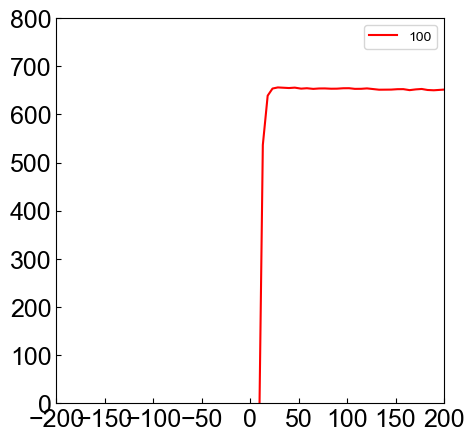

In [11]:
fig = plt.figure(figsize=(5, 5))

plt.plot(x_list,fixed_fit,color='RED',label="100")
#plt.plot(xa_list,fixed_fit_a,color='BLUE',label="110")
plt.legend()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)
#plt.ylabel('$ΔH_\mathrm{pp}$ (Oe)', fontsize=18)
#plt.xlabel('$θ_\mathrm{H}$ (deg.)', fontsize=18)
plt.xlim(-200,200)
plt.ylim(0,800)
"""
save_path="/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/解析/240425semi"
fig.savefig(f'{save_path}/figure_{filename1}_large.pdf',format="pdf", bbox_inches="tight", pad_inches=0.1)
fig.savefig(f'{save_path}/figure_{filename1}_large.png',format="png", bbox_inches="tight", pad_inches=0.1)
"""